In [2]:

import plotly.graph_objects as go
from wordcloud import WordCloud
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [9]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


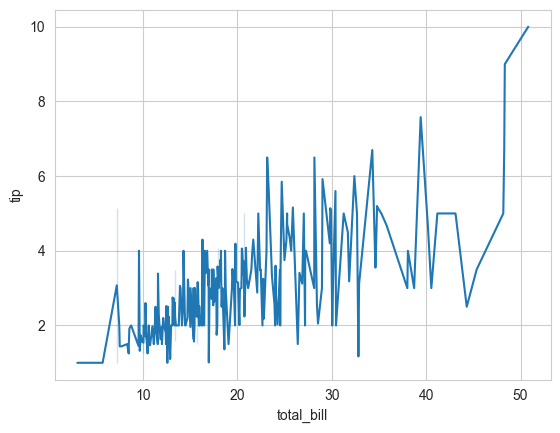

In [6]:
#line plot of tip amount vs total bill
sns.lineplot(data=tips, # choose our dataset
x='total_bill', # define our x variable
y='tip') # define our y variable

#this results in a simple line plot
#light blue indicates the less frequnent tip amount vs dark blue indicates most frequnt tip amount

#premade styles to alter the appearance
sns.set_style('whitegrid')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

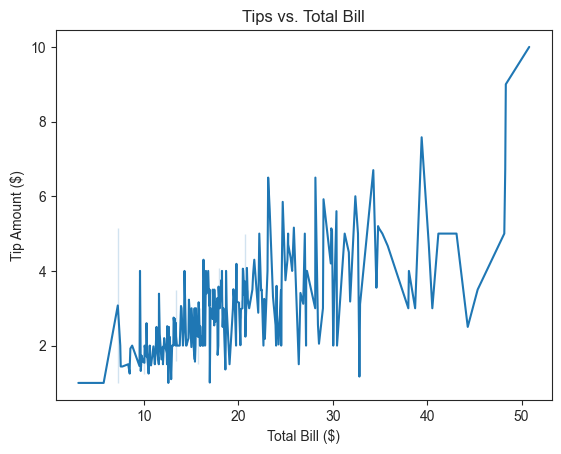

In [9]:
#adding labels
sns.set_style('ticks')
tipgraph = sns.lineplot(data=tips, x='total_bill', y='tip')
tipgraph.set(title='Tips vs. Total Bill', xlabel='Total Bill ($)', ylabel='Tip Amount ($)')



[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

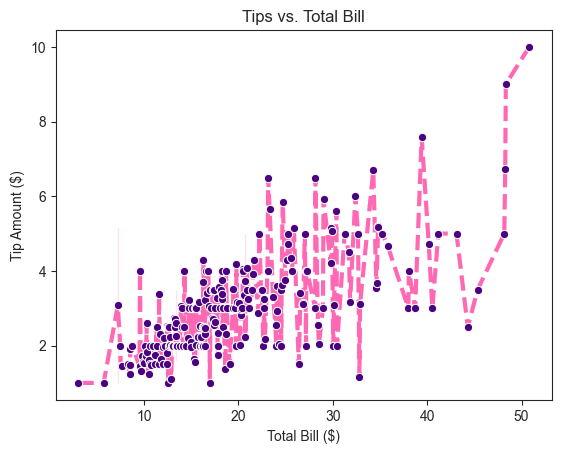

In [11]:
#change colour, marker style, and line style
tipgraph = sns.lineplot(data=tips,
x='total_bill',
y='tip',
color = 'hotpink',
linestyle = '--',
linewidth = 3,
marker = 'o',
markerfacecolor = 'indigo')

tipgraph.set(title='Tips vs. Total Bill', 
             xlabel='Total Bill ($)', 
             ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

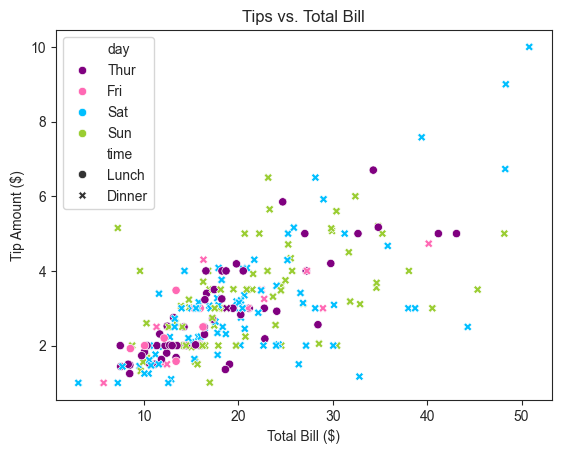

In [ ]:
#represent multiple variables with different visual elements 
tipgraph = sns.scatterplot(data=tips, x='total_bill',
                           y='tip', style = 'time', hue ='day', 
                           palette = ['purple','hotpink','deepskyblue','yellowgreen'])

tipgraph.set(title='Tips vs. Total Bill',
xlabel='Total Bill ($)',
ylabel='Tip Amount ($)')

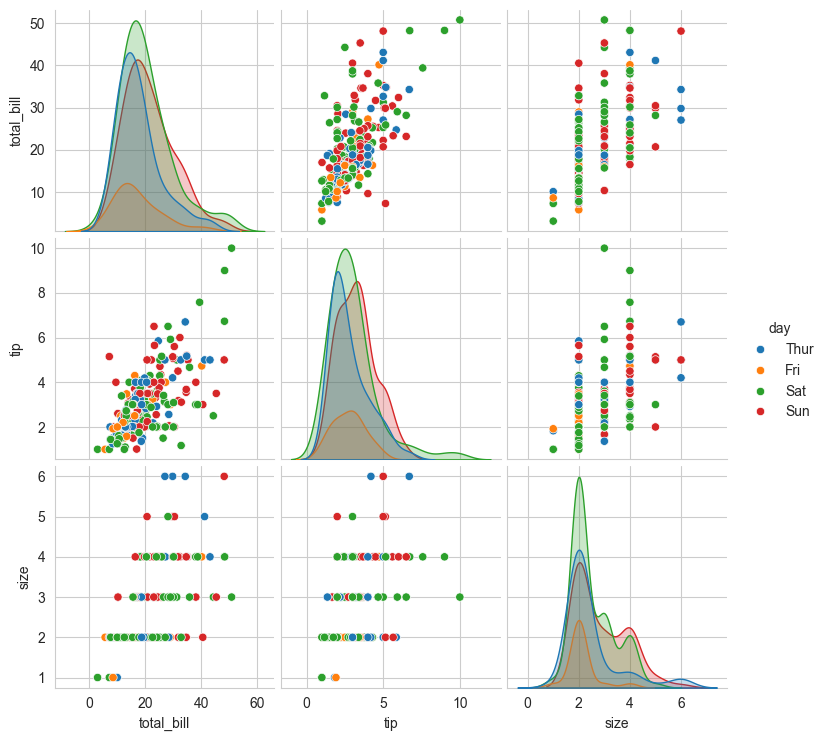

In [ ]:
#pairplot, multiple plots to compare the relationship between variables
#only three quantitative varibales in the dataset, the rest are categorical

sns.pairplot(data = tips,hue = 'day')

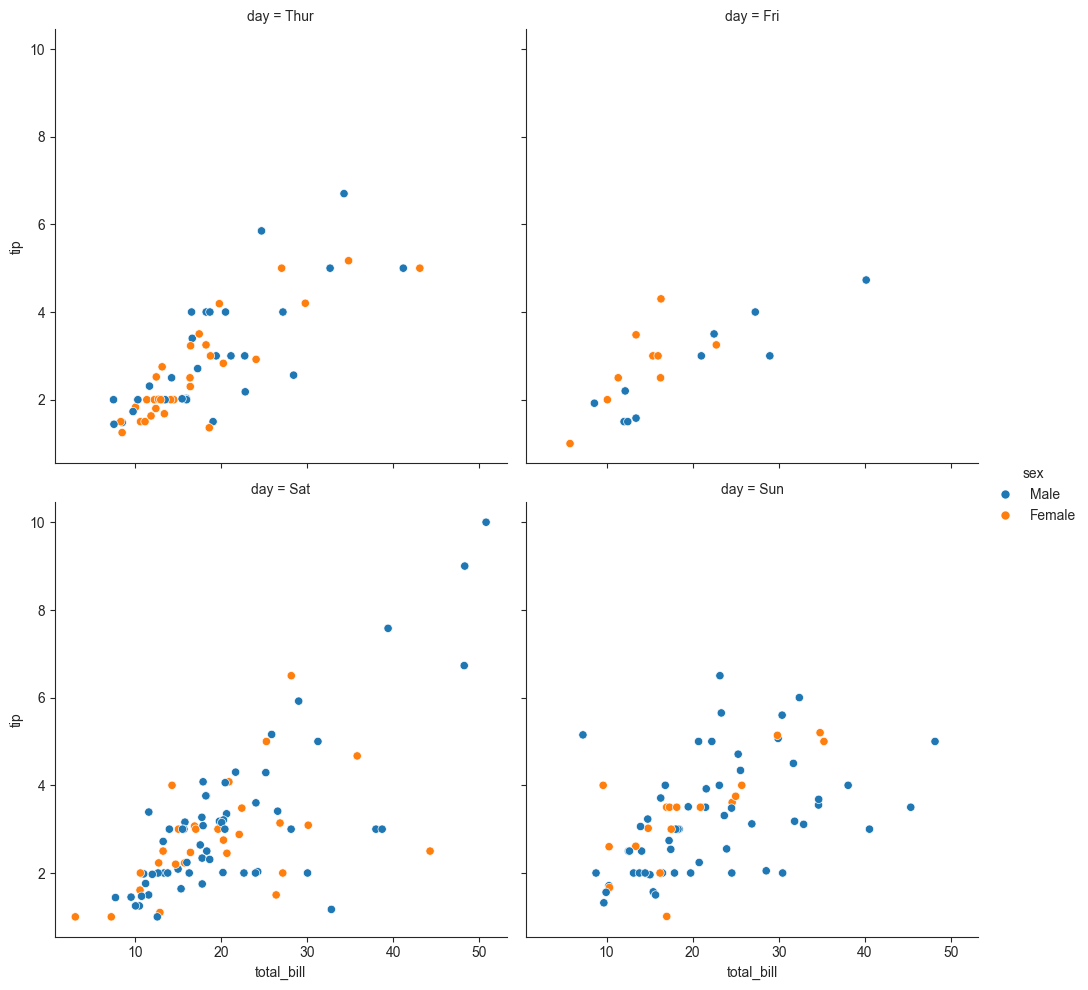

In [ ]:
#relplot
daysplot = sns.relplot(data=tips, x="total_bill", y="tip", hue="sex", 
                       col="day",       #split the data points into separate in different panels
                       kind="scatter",
                       col_wrap=2)      #wrap the plot into two columns per row

In [15]:
#plotly
import plotly.graph_objects as go # 'go' is 'graph objects’

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [16]:
graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1)) #add_trace adds bar graph, Bar adds bars

#update the layout by adding title and labels
graph.update_layout(title="Pirate Scores", xaxis_title="Pirates", yaxis_title="Score")

In [27]:
#graph.write_html("../../folders/pirategraph.html")   save plotly graphs as HTML files

In [18]:
#customizing the graph

graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers', 
                           marker=dict(size=15,                            # point size
                                       color='hotpink',                    # point colour
                                       opacity=1,                          # point transparency/alpha
                                       line=dict(width=5, color='purple')  # point outline
                                       )))

graph.update_layout(title='Interactive Pirate Plot', 
                    xaxis_title='Pirates', yaxis_title='Scores', 
                    width=500, height=500)

In [20]:
#qualitative visualization: WordCloud
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip')
print(df)


                                                 quote  \
0                      Do, or do not. There is no try.   
1    Listen to them. Children of the night. What mu...   
2                              It's alive! It's alive!   
3    Oh, no, it wasn't the airplanes. It was Beauty...   
4    Magic Mirror on the wall, who is the fairest o...   
..                                                 ...   
727  I didn't know if you were lost. Stick with me....   
728  This guy's awesome! He's holding his own while...   
729     Murder is murder, it don’t matter who you are.   
730  You know what a lion is? A lion is a strong an...   
731  That was the best acting i've ever seen in my ...   

                                              movie   type  year  
0    Star Wars: Episode V - The Empire Strikes Back  movie  1890  
1                                           Dracula  movie  1931  
2                                      Frankenstein  movie  1931  
3                                  

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

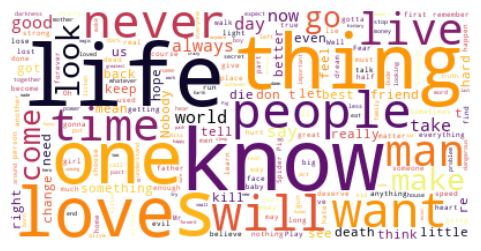

In [21]:
# join all all text from each row from the quote column into a string
text = " ".join(each for each in df.quote)

# generate wordcloud image with specified clour palette
wordcloud = WordCloud(background_color="white", colormap = 'inferno').generate(text)

# use matplotlib syntax to put the image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, 
          interpolation='bilinear')      #helps smooth our image
ax.axis("off")

In [ ]:
#Venn diagram

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

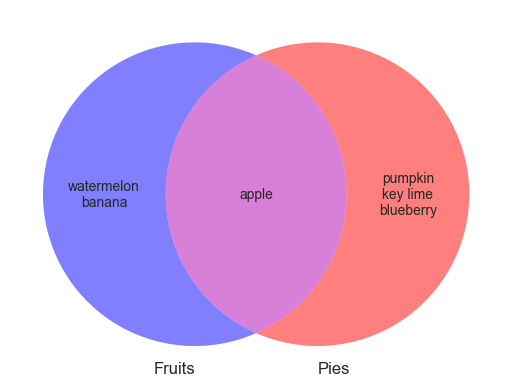

In [ ]:
diagram = venn2_unweighted([A, B], set_labels = ('Fruits', 'Pies'), 
                           set_colors=("blue", "red"),
                           alpha=0.5)

#the numbers refer to different regions
diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))
